## Financial Engineering HW5     

1. 首先，使用 QuantLib 模擬出利率，這邊假設市場波動為0.1，Hull White常數為0.1，過程共10年，分為1000期，且初始遠期利率為0.05。
2. 將模擬出之利率代入 Geometric Brownian Motion，模擬出股價。(這邊我模擬100次)
3. 利用各條模擬出之股價的最後一期股價算出買賣權之 payoff。(這邊假設履約價為110)
4. 將 payoff 取期望值後折現回當期。(這邊假設無風險利率為0.02)


市場波動為？(小數點) 0.1
Hull White常數為？(小數點) 0.1
過程要幾段期間？(整數) 1000
過程共要幾年？(單位：年) 10
f(0,t)為？(小數點) 0.05


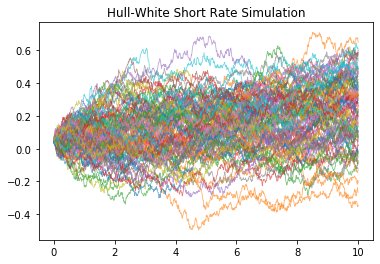

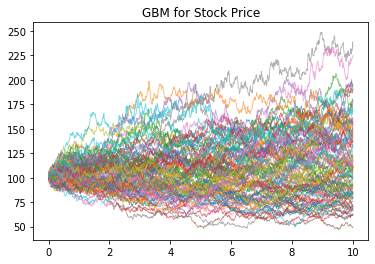

履約價為？ 110
無風險利率為？(小數點) 0.02
Call value =  14.684125651275936
Put value =  11.057799089332848


In [4]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 利用 QuantLib 模擬利率
sigma = float(input("市場波動為？(小數點) ")) # 0.1
a = float(input("Hull White常數為？(小數點) ")) # 0.1
timestep = int(input("過程要幾段期間？(整數) ")) # 1000
length = int(input("過程共要幾年？(單位：年) ")) # 10 
forward_rate = float(input("f(0,t)為？(小數點) ")) # 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(11, 5, 2020)

ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

num_paths = 100 #做幾次 GBM
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

# 將模擬出的利率代入 GBM 算出股價
S0 = 100
Sp = []
np.random.seed(2)
dt = length/timestep

for i in range(num_paths):
    W = np.random.standard_normal(size = timestep+1)
    W = np.cumsum(W)*np.sqrt(dt)
    X = (paths[i]-0.5*sigma**2)*time[i] + sigma*W
    S = S0*np.exp(X)
    plt.plot(time, S, lw=0.8, alpha=0.6)
    Sp.append(S)
plt.title("GBM for Stock Price")
plt.show()

# 計算選擇權 payoff
k = float(input("履約價為？ "))
r = float(input("無風險利率為？(小數點) "))

C = []
P = []
for i in range(num_paths):
    C.append(max(Sp[i][-1]-k,0))
    P.append(max(k-Sp[i][-1],0))

C_0 = np.mean(C)*np.exp(-r*length)
P_0 = np.mean(P)*np.exp(-r*length)
print("Call value = " ,C_0)
print("Put value = " ,P_0)    

